## S&P 500 Index price values

### Get Data

*(could be done more easily by using pandas built-in APIs to read financial data)*

In [1]:
import pandas as pd
import datetime as dt

rawData = pd.read_csv('resources/timeSeries/sp500.csv')
rawData['day'] = rawData['Date'].apply(lambda x: dt.datetime(*[int(_) for _ in x.replace('-0', '-').split('-')]))

### Normalize data on (entire) dataset

In [2]:
from sklearn.preprocessing import MinMaxScaler

allData = rawData['Close'].values.reshape(-1, 1)

normalizerModel = MinMaxScaler().fit(allData)
normalizedData = normalizerModel.transform(allData)

originalDataSize = allData.shape[0]

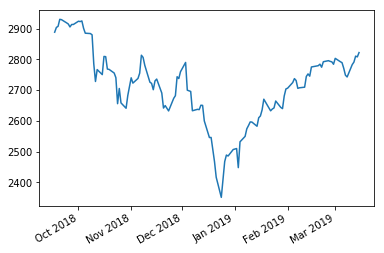

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot_date(rawData['day'], rawData['Close'], linestyle='solid', marker=None)
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

### Separate train / test

In [5]:
trainCutOff = 95
trainData = normalizedData[:trainCutOff]

In [6]:
print('Original data: %d daily prices' % originalDataSize)
print('Training data: first %d samples only' % trainCutOff)

Original data: 124 daily prices
Training data: first 95 samples only


### Import all relevant functions and set value of $\tau$

In [7]:
# set tau = 8

from helperFunctions import *

In [8]:
decimalInitial = findInitialCondition(trainData)

significance = 760 bits ; 228 digits (base-10) ; ratio = 3.333



In [9]:
print(decimalInitial)
print('\nnumber of decimal digita = %d' % len(str(decimalInitial)))

0.918652500867317069706121517774381947210357438350493986469095469279218435881209829606384731739470802166549191011747211905687147014341039869287275246189278502982951415770973892328994766865216570536672099485574178884250989741343121

number of decimal digita = 230


### Apply logisitic decoder on entire dataset (that extends beyond training)

In [10]:
decodedValues = generateData(decimalInitial, originalDataSize)

### Normalize back to original scale

In [11]:
decodedValues = np.array(decodedValues).reshape(-1, 1)
decodedValues = normalizerModel.inverse_transform(decodedValues)

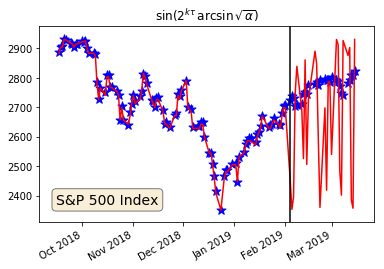

In [12]:
from matplotlib import pyplot as mp

fig, ax = plt.subplots()
ax.plot_date(rawData['day'], decodedValues[:, 0], linestyle='solid', marker=None, color='red')
ax.scatter(rawData['day'].values, rawData['Close'], c='blue', marker='*', s=90)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.15, 'S&P 500 Index', transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

ax.axvline(x=mdates.date2num(rawData['day'][trainCutOff]), c='k')

fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title(r'$\sin ( 2^{k \tau} \, \arcsin \, \sqrt{\alpha} )$')

mp.savefig('resources/timeSeries/generalization.png')

plt.show()